# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau

# Dataset

In [3]:
filePath = 'D:\\New folder\\Emotion_final.csv'
df = pd.read_csv(filePath)
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [5]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [6]:
category = pd.get_dummies(df.Emotion)
df1 = pd.concat([df, category], axis=1)
df1 = df1.drop(columns='Emotion')

# Data Preprocessing

In [7]:
X = df1['Text'].values
y = df1[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<x>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Seq_train = tokenizer.texts_to_sequences(X_train)
Seq_test = tokenizer.texts_to_sequences(X_test)

Pad_train = pad_sequences(Seq_train)
Pad_test = pad_sequences(Seq_test)

# Build The Model

In [17]:
model = Sequential([
    Embedding(input_dim = 5000, output_dim = 128),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         640000    
                                                                 
 lstm_5 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_9 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)              

# Train The Model

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    Pad_train, y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (Pad_test, y_test),
    verbose = 1,
)

Epoch 1/60
68/68 [==============================] - 15s 182ms/step - loss: 1.6119 - accuracy: 0.3152 - val_loss: 1.5026 - val_accuracy: 0.3600
Epoch 2/60
68/68 [==============================] - 12s 180ms/step - loss: 1.1716 - accuracy: 0.5099 - val_loss: 0.8340 - val_accuracy: 0.6752
Epoch 3/60
68/68 [==============================] - 12s 183ms/step - loss: 0.6807 - accuracy: 0.7312 - val_loss: 0.6600 - val_accuracy: 0.7542
Epoch 4/60
68/68 [==============================] - 12s 183ms/step - loss: 0.4409 - accuracy: 0.8366 - val_loss: 0.4761 - val_accuracy: 0.8497
Epoch 5/60
68/68 [==============================] - 13s 189ms/step - loss: 0.2742 - accuracy: 0.9099 - val_loss: 0.4096 - val_accuracy: 0.8760
Epoch 6/60
68/68 [==============================] - 13s 188ms/step - loss: 0.2057 - accuracy: 0.9320 - val_loss: 0.3880 - val_accuracy: 0.8900
Epoch 7/60
68/68 [==============================] - 13s 190ms/step - loss: 0.1598 - accuracy: 0.9491 - val_loss: 0.3824 - val_accuracy: 0.8889

# Plot The Graph

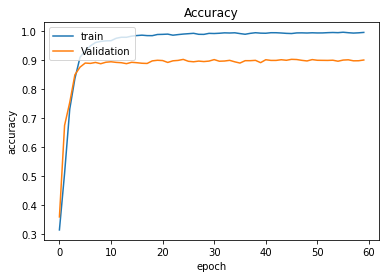

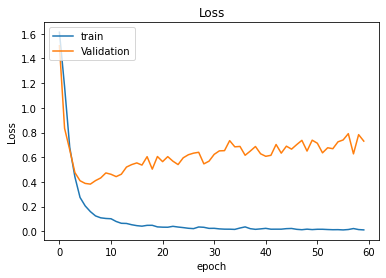

In [22]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()